In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [356]:
#4 Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`

gdp_df = pd.read_csv(r'C:\Users\Dell\Documents\gdp-and-internet-usage-Eliab16\notebooks\data\gdp_percapita.csv')


gdp_df.shape

In [380]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


In [359]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


In [360]:
# 5 How many rows and columns are in `gdp_df`? What are the data types of each column?
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB



gdp_df.tail()

#4  ans 7662 total rows and 4 columns

In [495]:
#  Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'
# gdp_df = gdp_df.drop(columns = ['Value Footnotes'])

gdp_df.rename(columns={'Country or Area':'Country', 'Year':'Year', 'Value':'GDP_Per_Capita'}, inplace=True)

gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


In [508]:
# 7. How many countries have data for all years?
count_years = gdp_df['Year'].nunique()
print(count_years)

33


In [510]:
# 7b Which countries are missing many years of data?
unique_years = pd.DataFrame(gdp_df.groupby(['Country'])['Year'].count())
print(unique_years)
# unique_years.reset_index(inplace=True)
# print(unique_years[unique_years['Years']==33])
# print(unique_years[unique_years['Years']!=33])

                             Year
Country                          
Afghanistan                    20
Africa Eastern and Southern    33
Africa Western and Central     33
Albania                        33
Algeria                        33
...                           ...
Viet Nam                       33
West Bank and Gaza             29
World                          33
Zambia                         33
Zimbabwe                       33

[242 rows x 1 columns]


In [514]:
#  How many countries have data for all years
unique_years[unique_years['Year']==33].count()


Year    202
dtype: int64

In [516]:
unique_years[unique_years['Year']!=33].sort_values(['Year'])

,Year
Country,
Djibouti,10
Somalia,10
Turks and Caicos Islands,12
Sint Maarten (Dutch part),14
Kosovo,15
Cayman Islands,16
Nauru,19
Afghanistan,20
CuraÃ§ao,22


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


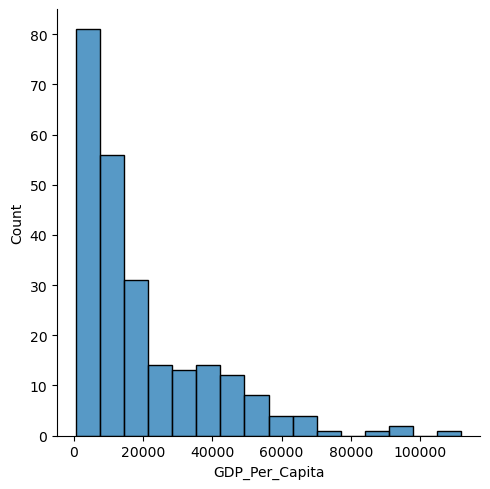

In [452]:
# In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020
#8 Create a histogram
gdp_df_filtered = gdp_df[gdp_df['Year'] == 2020]
sns.displot(x=gdp_df_filtered['GDP_Per_Capita'])



<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

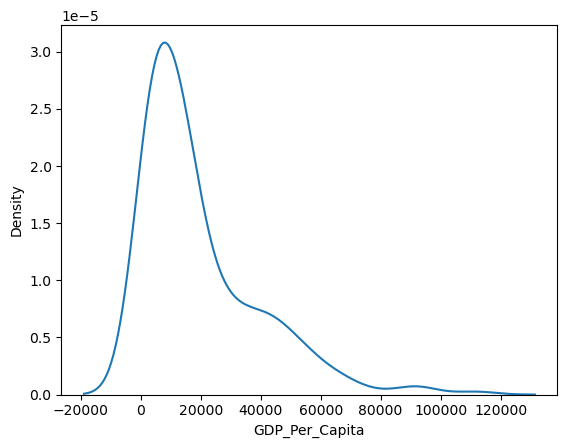

In [475]:
# density plot
sns.kdeplot(gdp_df_filtered['GDP_Per_Capita'])



<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

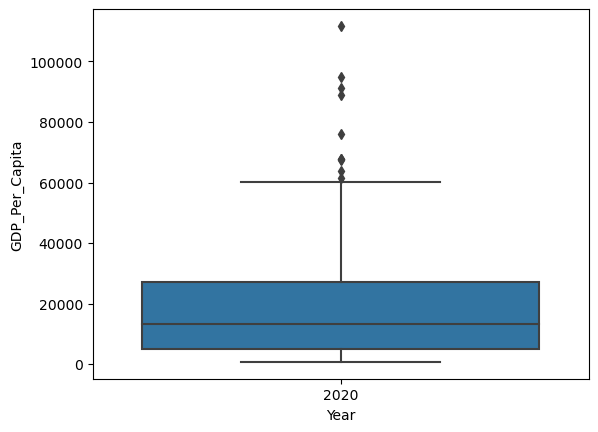

In [280]:
#boxplot
gdp_df_filtered = gdp_df[gdp_df['Year'] == 2020]
sns.boxplot(x=gdp_df_filtered['Year'],y=gdp_df_filtered['GDP_Per_Capita'])




<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

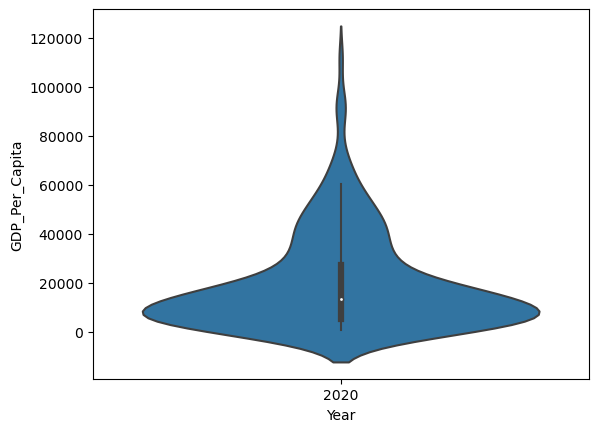

In [260]:
# violinplot
gdp_df_filtered = gdp_df[gdp_df['Year'] == 2020]
sns.violinplot(
    x = gdp_df_filtered['Year'],
    y = gdp_df_filtered['GDP_Per_Capita'])
    


8b What do you notice when you look at these plots?
 Histogram showing the frequency of GDP_per_capita value within different range.
 Density Plot provide clearer representation of the data's overall shape and peaks.
boxplot gives visual summery of(minimum,first quartile,median,third quartile and maximum)
Violin Plot combine feature of abox plot and density plot and provide view of distrbution probability density at different value

 8c How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?
 Histogram and density plot both provide distbution shape and central tendecies but density plot offers smoother representation
 of the data making it easier to identify peaks and troughs.
 Box Plot provides a clear visualization of the distribution median,quartiles and any outiliers making it ideal for identifying 
 presence of extreme value and comparing distributions.
 violinplot providing a richer distributions summary statistics and shape.

In [476]:
# 9 What was the median GDP per capita value in 2020
gdp_df_filtered = gdp_df[gdp_df['Year'] == 2020]
# GDP_Per_Capita = gdp_df_filtered['GDP_Per_Capita']
median_gdp_per_capita = gdp_df_filtered['GDP_Per_Capita'].agg('median')
print(median_gdp_per_capita)

13357.997573370474


# 9 Median =13.35

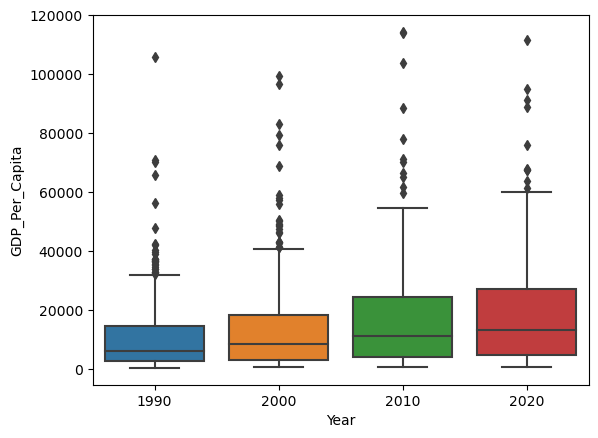

In [482]:
#10 compare GDP per capita values for the years 1990, 2000, 2010 and 2020
# gdp_decades = gdp_df[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]
sns.boxplot(data = gdp_decades,x='Year',y= 'GDP_Per_Capita')
plt.show()

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

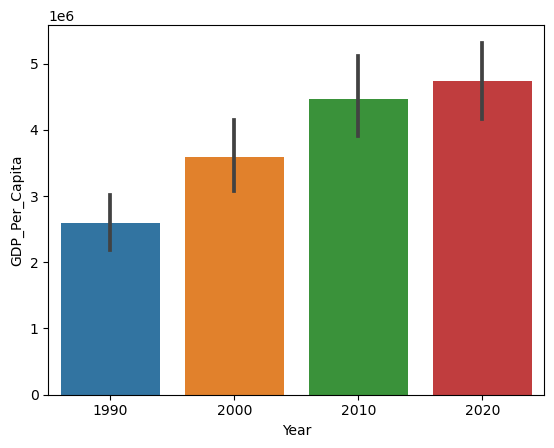

In [192]:
# barplot
gdp_decades = gdp_df[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]
sns.barplot(
    y="GDP_Per_Capita", 
    x="Year", 
    data = gdp_decades, 
    estimator=sum)
    

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

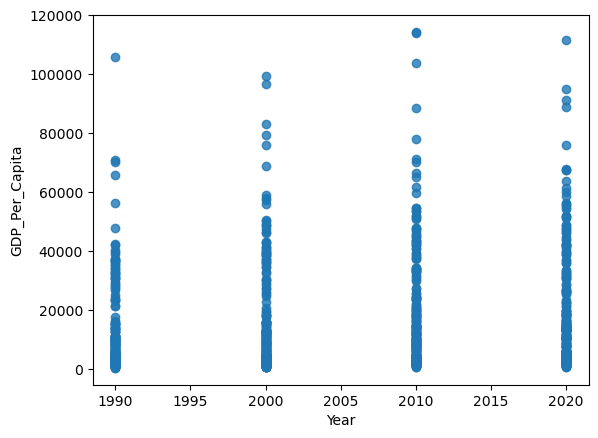

In [255]:
# A scatterplot
gdp_decades = gdp_df[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]
sns.regplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"],fit_reg=False)



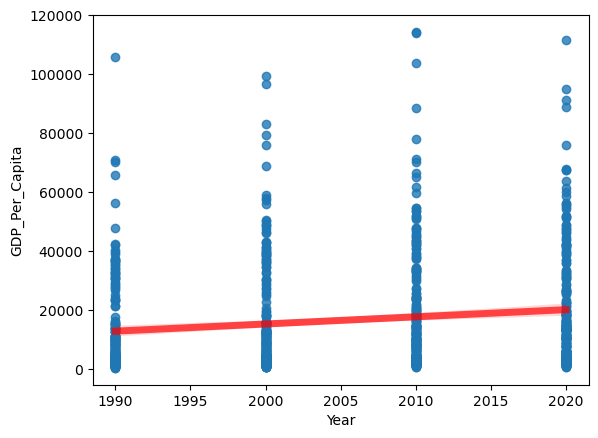

In [195]:
# A scatterplot with a trend line overlaid
gdp_decades = gdp_df[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]
sns.regplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

10How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?
 ans Boxlot this visualizations can help idefying central tendency,variability and presence of outilers for each year 
 Box plot can help comparing the overall spread and centeral tendency of GDP per capita value over time.
 Bar Plot this visualization allows a direct comparsion of GDP per capita values across the selected year.
 Scatterplot helps observing the individual data points for each year and identifying any patterns or trnds in GDP per capita
 value over year
 Scatterplot with Trend Line  provide a clearer observation and may oversimplify complex relationship.

In [478]:
11# Which country was the first to have a GDP per capita greater than $100,000?
GDP_Per_Capita > 100000
gdp_df_sorted=gdp_df.sort_values('Year')
gdp_df_filtered = gdp_df_sorted[gdp_df_sorted['GDP_Per_Capita'] > 100000]
first_row = gdp_df_filtered.iloc[0]
Country = first_row['Country']
print(Country)


United Arab Emirates


In [222]:
#12  Which country had the highest GDP per capita in 2020
gdp_df_2020 = gdp_df[gdp_df['Year']==2020]
highest_gdp_country = gdp_df_2020.loc[gdp_df_2020['GDP_Per_Capita'].idxmax()]
highest_gdp_country_name = highest_gdp_country['Country']
gdp_per_capita = highest_gdp_country['GDP_Per_Capita']
print(highest_gdp_country_name)
print(gdp_per_capita)


Luxembourg
111751.3147513618


Text(0, 0.5, 'GDP_Per_Capita')

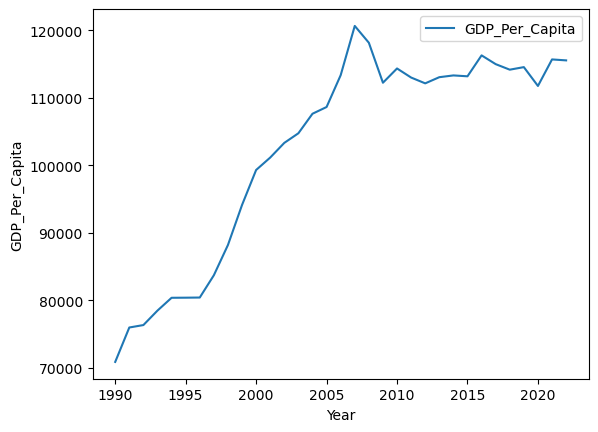

In [275]:
#13 Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset
gdp_Lux = gdp_df[gdp_df['Country'] == 'Luxembourg']
gdp_Lux.plot.line('Year','GDP_Per_Capita')
plt.xlabel('Year')
plt.ylabel('GDP_Per_Capita')

In [237]:
#13 Which country had the lowest GDP per capita in 2020
gdp_df_2020 = gdp_df[gdp_df['Year']==2020]
lowest_gdp_country = gdp_df_2020.loc[gdp_df_2020['GDP_Per_Capita'].idxmin()]
lowest_gdp_country_name = lowest_gdp_country['Country']
gdp_per_capita = lowest_gdp_country['GDP_Per_Capita']
print(lowest_gdp_country_name)
print(gdp_per_capita)

Burundi
711.355263423169


Text(0, 0.5, 'GDP_Per_Capita')

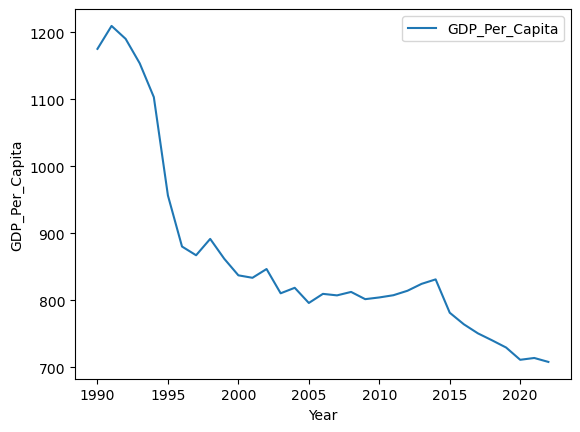

In [276]:
# Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset
gdp_Br = gdp_df[gdp_df['Country'] == 'Burundi']
gdp_Br.plot.line('Year','GDP_Per_Capita')
plt.xlabel('Year')
plt.ylabel('GDP_Per_Capita')

In [444]:
#14 internet_df_new = pd.read_csv(r'C:\Users\Dell\Documents\gdp-and-internet-usage-Eliab16\notebooks\data)\internet_use.csv')
internet_df = pd.read_csv(r'C:\Users\Dell\Documents\gdp-and-internet-usage-Eliab16\notebooks\data\internet_use.csv', nrows = 4495)

internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
...,...,...,...,...
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN


In [363]:
internet_df.shape

(4675, 4)

In [424]:
# 14take per a look at the top and bottom few rows to make sure that it has been read in correctly
internet_df.tail()

,Country or Area,Year,Value,Value Footnotes
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


In [425]:
internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN


In [366]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4675 entries, 0 to 4674
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  4675 non-null   object 
 1   Year             4675 non-null   object 
 2   Value            4495 non-null   float64
 3   Value Footnotes  948 non-null    float64
dtypes: float64(2), object(2)
memory usage: 146.2+ KB


In [445]:
#15Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'
internet_df = internet_df.drop(columns = ['Value Footnotes'])
# internet_df = gdp_df.drop(columns = ['Value Footnotes'])
internet_df.rename(columns={'Country or Area':'Country', 'Year':'Year', 'Value':'Internet_Users_Pct'}, inplace=True)
internet_df.head(10)


,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
5,Afghanistan,2009,3.550000
6,Afghanistan,2008,1.840000
7,Afghanistan,2007,1.900000
8,Afghanistan,2006,2.107124
9,Afghanistan,2005,1.224148


In [427]:
16# Look at the number of observations in this dataset per year. What do you notice?
observetio_per_year = internet_df['Year'].value_counts().sort_index()
print(observetio_per_year)


Year
1960      7
1965      7
1970      7
1975      7
1976      7
1977      7
1978      7
1979      7
1980      7
1981      7
1982      7
1983      7
1984      7
1985      7
1986      7
1987      7
1988      7
1989      8
1990    210
1991     39
1992     50
1993     65
1994     91
1995    138
1996    175
1997    184
1998    190
1999    198
2000    199
2001    201
2002    202
2003    196
2004    199
2005    201
2006    200
2007    206
2008    204
2009    203
2010    203
2011    207
2012    203
2013    202
2014    202
Name: count, dtype: int64


number of observation per year start changing after year 1989

In [446]:
# 17 What is the first year to have a non-zero internet users percentage value?
internet_df_non_zero = internet_df[internet_df['Internet_Users_Pct'] > 0]
first_year = internet_df_non_zero['Year'].min()
print(first_year)

1990


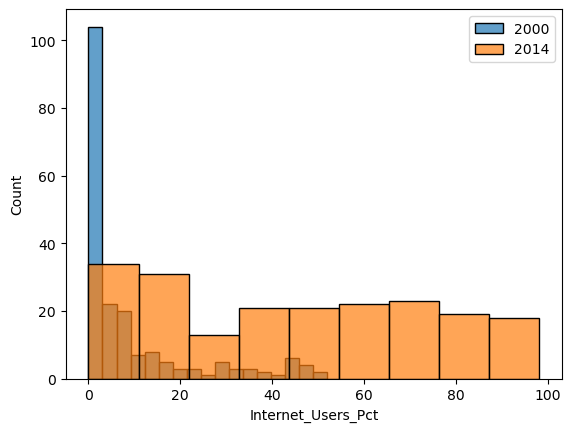

In [489]:
# 18How does the distribution of internet users percent differ for 2000 and 2014?
internet_df_2020 = internet_df[internet_df['Year'] == 2000]
internet_df_2014 = internet_df[internet_df['Year'] == 2014]
sns.histplot(internet_df_2020['Internet_Users_Pct'],label='2000',alpha=0.7)
sns.histplot(internet_df_2014['Internet_Users_Pct'],label='2014',alpha=0.7)
plt.legend()
plt.show()



In [448]:
# 19For how many countries was the percentage of internet users below 5% in 2014?
# below_5_percent_2014 = internet_df[(internet_df['Year']==2014)&(internet_df['Internet_Users_Pct'] < 5.0)]
# num_countries_below_5_percent = below_5_percent_2014['Country'].nunique()
# print(num_countries_below_5_percent)
below_5_percent_2014 = internet_df[internet_df['Year']==2014]
num_countries_below_5_percent =pd.DataFrame(below_5_percent_2014[below_5_percent_2014['Internet_Users_Pct'] < 5].count())
print(num_countries_below_5_percent)


                     0
Country             16
Year                16
Internet_Users_Pct  16


In [458]:
# 20 Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames
# gdp_and_internet_use = pd.concat([gdp_df,internet_df],axis=1)
gdp_and_internet_use = gdp_df.merge(internet_df, on=['Country','Year'],how = 'left')
# gdp_and_internet_use = gdp_df.merge(gdp_df,internet_df,on =['Country','Year'])
print(gdp_and_internet_use)



          Country  Year  GDP_Per_Capita  Internet_Users_Pct
0     Afghanistan  2021     1517.016266                 NaN
1     Afghanistan  2020     1968.341002                 NaN
2     Afghanistan  2019     2079.921861                 NaN
3     Afghanistan  2018     2060.698973                 NaN
4     Afghanistan  2017     2096.093111                 NaN
...           ...   ...             ...                 ...
7657     Zimbabwe  1994     2670.106615            0.001739
7658     Zimbabwe  1993     2458.783255                 NaN
7659     Zimbabwe  1992     2468.278257                 NaN
7660     Zimbabwe  1991     2781.787843                 NaN
7661     Zimbabwe  1990     2704.757299            0.000000

[7662 rows x 4 columns]


In [459]:
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7657,Zimbabwe,1994,2670.106615,0.001739
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,0.000000


In [460]:
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


In [461]:
#21 Find the three countries with the highest internet users percentage in 2014.
gdp_internet_2014 = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014]
top_three_countries = gdp_internet_2014.nlargest(3,'Internet_Users_Pct')
print(top_three_countries[['Country','Internet_Users_Pct']])


      Country  Internet_Users_Pct
2993  Iceland               98.16
687   Bermuda               96.80
5212   Norway               96.30


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


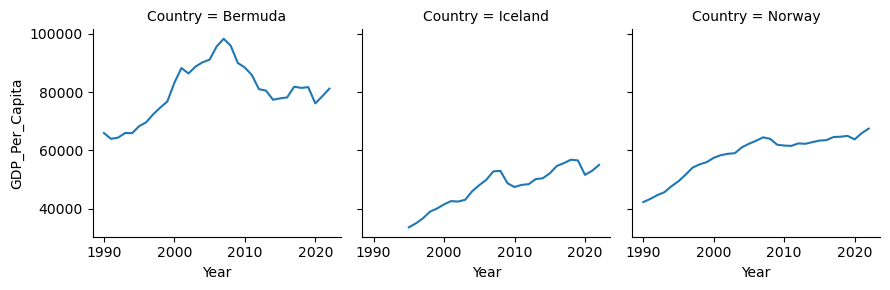

In [474]:
#21bUse a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries
gdp_over_time = gdp_df[gdp_df['Country'].isin(['Iceland','Bermuda','Norway'])]
grid=sns.FacetGrid(gdp_over_time,col='Country')
grid.map(sns.lineplot,'Year','GDP_Per_Capita)

#22
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year'].isin([2014])]

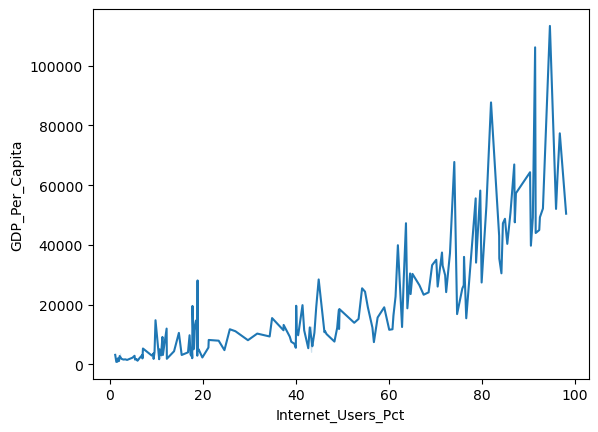

In [472]:
#23 Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014
sns.lineplot(data=gdp_and_internet_use_2014,x='Internet_Users_Pct', y='GDP_Per_Capita')
plt.show()

In [473]:
# 24Use the `qcut` function Label these groups as "Low", "Medium", and "High"
gdp_and_internet_use_2014['GDP_group'] = pd.qcut(gdp_and_internet_use_2014['GDP_Per_Capita'],q=3,labels=['low','medium','high'])
print(gdp_and_internet_use_2014)

                          Country  Year  GDP_Per_Capita  Internet_Users_Pct  \
7                     Afghanistan  2014     2144.449634                6.39   
28    Africa Eastern and Southern  2014     3642.875373                 NaN   
61     Africa Western and Central  2014     4146.994622                 NaN   
94                        Albania  2014    11586.817446               60.10   
127                       Algeria  2014    11561.259795               18.09   
...                           ...   ...             ...                 ...   
7509                     Viet Nam  2014     7641.909252               48.31   
7542           West Bank and Gaza  2014     5967.073437                 NaN   
7571                        World  2014    15120.730322                 NaN   
7604                       Zambia  2014     3375.941270               17.34   
7637                     Zimbabwe  2014     2316.954536               19.89   

     GDP_group  
7          low  
28         low  


C:\Users\Dell\AppData\Local\Temp\ipykernel_12404\3955880260.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_and_internet_use_2014['GDP_group'] = pd.qcut(gdp_and_internet_use_2014['GDP_Per_Capita'],q=3,labels=['low','medium','high'])


<Axes: xlabel='GDP_Per_Capita', ylabel='GDP_group'>

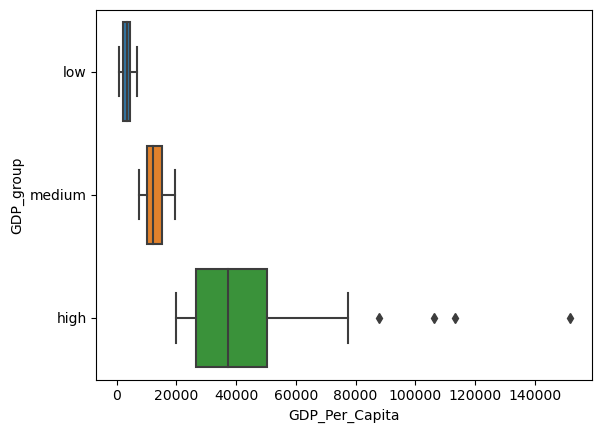

In [491]:
# Put these labels in a new column, named "GDP_group"
sns.boxplot(data=gdp_and_internet_use_2014,x='GDP_Per_Capita',y='GDP_group')

In [465]:
# 25 How does the median internet users percentage compare for the three gdp groups?
gdp_and_internet_use_2014.groupby(['GDP_group'])['Internet_Users_Pct'].median()

GDP_group
low       10.6
medium    43.4
high      78.7
Name: Internet_Users_Pct, dtype: float64

high GPD_group have high internet user percentage when you compare with low and medium median value